In [989]:
import pandas as pd

historical_data = pd.read_csv(r'C:\Users\user\Desktop\Data-Storm-4\data-storm-4\Historical-transaction-data.csv')
store_data = pd.read_csv(r'C:\Users\user\Desktop\Data-Storm-4\data-storm-4\Store-info.csv')

In [990]:
historical_data.columns

Index(['item_description', 'transaction_date', 'invoice_id', 'customer_id',
       'shop_id', 'item_price', 'quantity_sold'],
      dtype='object')

In [991]:
store_data.columns

Index(['shop_id', 'shop_area_sq_ft', 'shop_profile'], dtype='object')

**Pre-processing Historical Transaction Data**

In [992]:
historical_data.size

3317818

In [993]:
historical_data.dtypes

item_description     object
transaction_date     object
invoice_id          float64
customer_id          object
shop_id              object
item_price            int64
quantity_sold         int64
dtype: object

In [994]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473974 entries, 0 to 473973
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_description  438046 non-null  object 
 1   transaction_date  473974 non-null  object 
 2   invoice_id        467654 non-null  float64
 3   customer_id       473974 non-null  object 
 4   shop_id           473974 non-null  object 
 5   item_price        473974 non-null  int64  
 6   quantity_sold     473974 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 25.3+ MB


In [995]:
historical_data.shape

(473974, 7)

In [996]:
historical_data.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [997]:
categorical_features = [column for column in historical_data.columns if historical_data[column].dtype == object]
print(categorical_features)

['item_description', 'transaction_date', 'customer_id', 'shop_id']


In [998]:
for x in categorical_features:
    print(x)
    print(historical_data[x].value_counts())

item_description
GINGER BEER 1.5L                59864
CREAM SODA 1.5L                 39608
CREAM SODA 500ML                34320
GINGER BEER 1L                  26808
ORANGE BARLEY 1.5L              23180
NECTO 1.5L                      21746
SODA 500ML                      16802
BOTTLED DRINKING WATER 500ML    15786
SODA PET 1.5L                   15652
FIT O ORANGE 1L                 15392
LEMONADE 1.5L                   13433
SODA 1L                         13151
TONIC PET 500ML                 12704
GINGER BEER 500ML               11939
CREAM SODA APPLE POP 1L         11736
FIT O ORANGE 200ML               9490
BOTTLED DRINKING WATER 1.5L      9194
ORANGE CRUSH 1.5L                8288
FIT O MIXED FRUIT 200ML          7618
FIT O MIXED FRUIT 1L             7124
FIT O MANGO 1L                   6664
LEMONADE 500ML                   6453
FIT O MANGO 200ML                6333
GINGER BEER SUGAR FREE 500ML     5980
DRY GINGER ALE PET 500ML         5894
STRAWBERRY MILK 180ML            

In [999]:
historical_data.describe()

,invoice_id,item_price,quantity_sold
count,4.676540e+05,473974.000000,473974.000000
mean,1.996684e+06,206.689734,1.925506
std,1.344594e+06,166.764732,1.634535
min,1.700000e+01,35.000000,-1.000000
25%,1.032114e+06,100.000000,1.000000
50%,2.032996e+06,200.000000,2.000000
75%,3.032568e+06,220.000000,2.000000
max,8.331754e+06,17400.000000,101.000000


In [1000]:
historical_data.isnull().sum()

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

<AxesSubplot:>

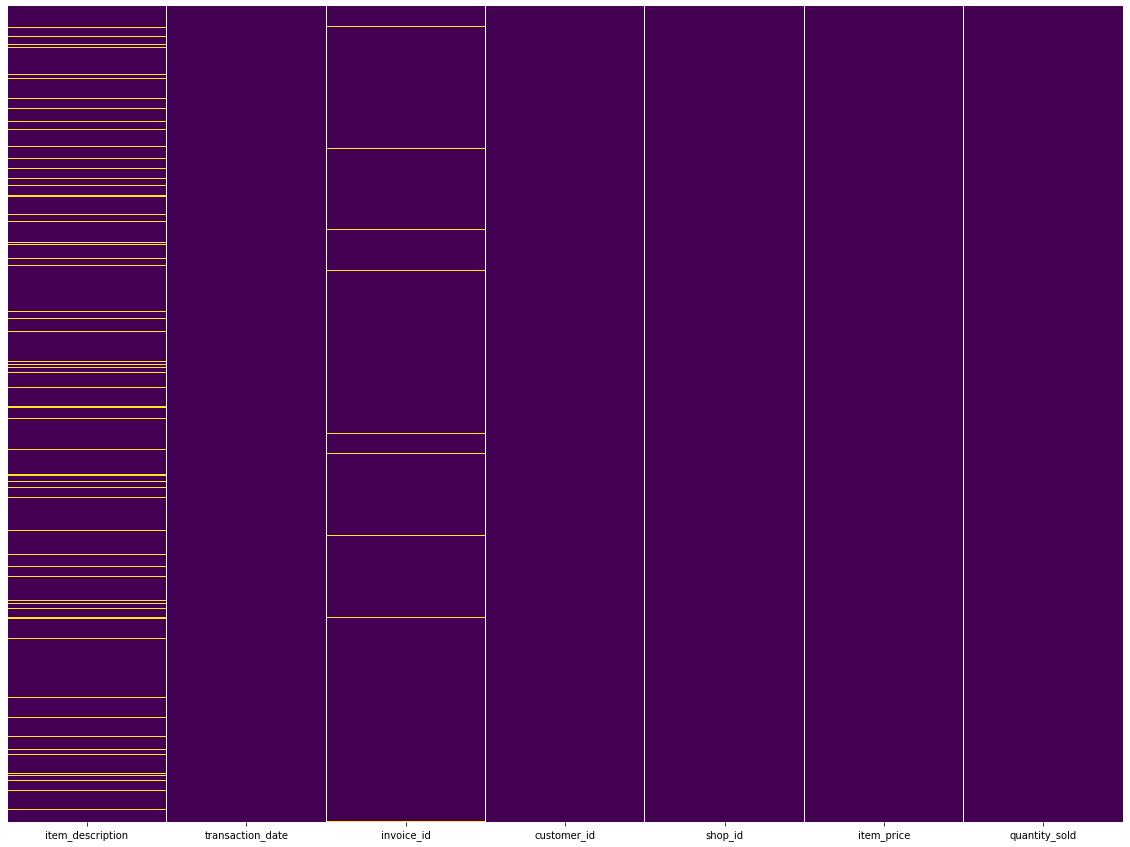

In [1001]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(20,15))
sns.heatmap(historical_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [1002]:
historical_data.drop(columns=["item_description","invoice_id"], inplace=True)

In [1003]:
historical_data.isnull().sum()

transaction_date    0
customer_id         0
shop_id             0
item_price          0
quantity_sold       0
dtype: int64

<AxesSubplot:>

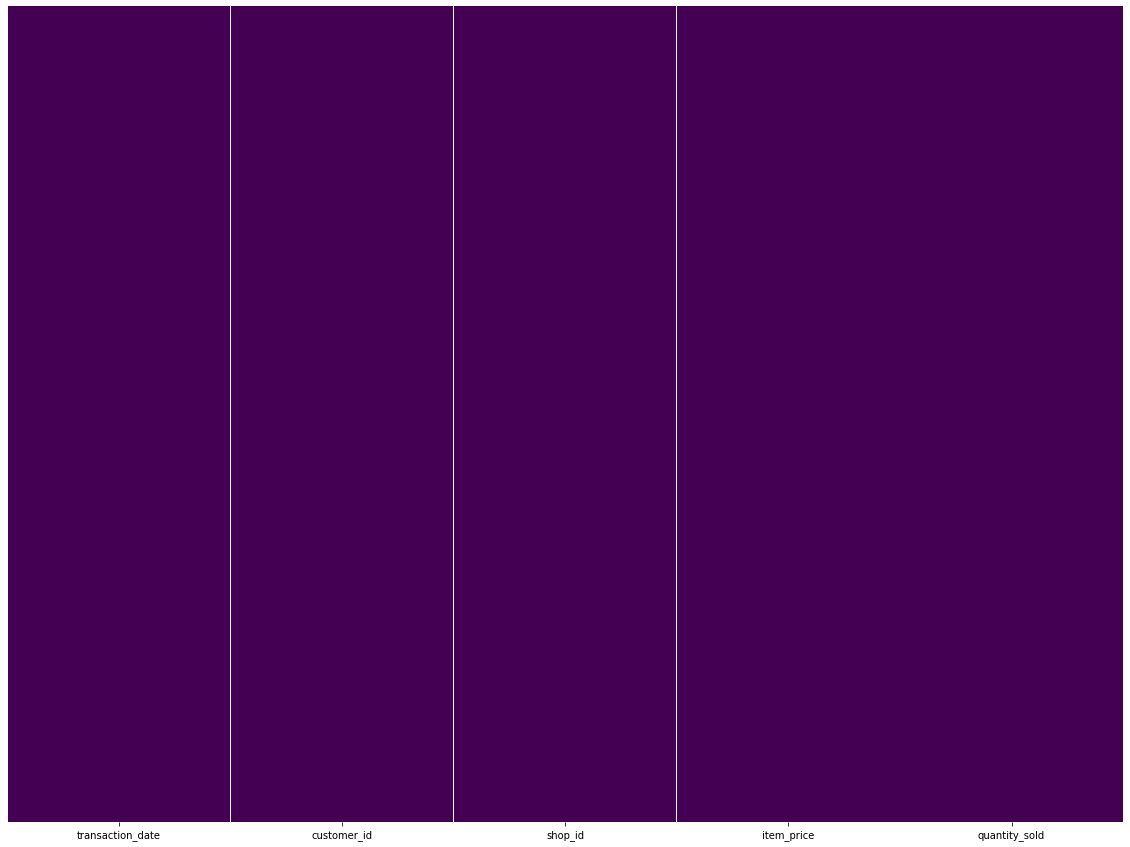

In [1004]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(20,15))
sns.heatmap(historical_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [1005]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['item_price', 'quantity_sold']
historical_data[numeric_features] = scaler.fit_transform(historical_data[numeric_features])

historical_data.head()

,transaction_date,customer_id,shop_id,item_price,quantity_sold
0,2021-12-11T00:00:00.000Z,BGXA,SHOP008,0.079815,0.045575
1,2021-10-17T00:00:00.000Z,IA25,SHOP112,0.079815,0.045575
2,2021-12-13T00:00:00.000Z,VN7V,SHOP008,-0.279974,0.045575
3,2021-12-13T00:00:00.000Z,VN7V,SHOP008,-0.339939,0.045575
4,2021-10-23T00:00:00.000Z,7S00,SHOP112,0.019850,1.880961


**Preporocessing Store Data**

In [1006]:
store_data.size

372

In [1007]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   shop_id          124 non-null    object
 1   shop_area_sq_ft  124 non-null    int64 
 2   shop_profile     100 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


In [1008]:
# store_data["shop_id"] = store_data["shop_id"].astype('category')
# store_data.dtypes

# store_data["shop_id"] = store_data["shop_id"].cat.codes
# store_data.head()

**Create Master Table**

In [1009]:
df = pd.merge(historical_data, store_data)

In [1010]:
df.head()

,transaction_date,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,2021-12-11T00:00:00.000Z,BGXA,SHOP008,0.079815,0.045575,678,Moderate
1,2021-12-13T00:00:00.000Z,VN7V,SHOP008,-0.279974,0.045575,678,Moderate
2,2021-12-13T00:00:00.000Z,VN7V,SHOP008,-0.339939,0.045575,678,Moderate
3,2021-12-10T00:00:00.000Z,VT9C,SHOP008,0.079815,-0.566221,678,Moderate
4,2021-12-10T00:00:00.000Z,8QLS,SHOP008,1.399040,-0.566221,678,Moderate


In [1011]:
df.head(-10)

,transaction_date,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,2021-12-11T00:00:00.000Z,BGXA,SHOP008,0.079815,0.045575,678,Moderate
1,2021-12-13T00:00:00.000Z,VN7V,SHOP008,-0.279974,0.045575,678,Moderate
2,2021-12-13T00:00:00.000Z,VN7V,SHOP008,-0.339939,0.045575,678,Moderate
3,2021-12-10T00:00:00.000Z,VT9C,SHOP008,0.079815,-0.566221,678,Moderate
4,2021-12-10T00:00:00.000Z,8QLS,SHOP008,1.399040,-0.566221,678,Moderate
...,...,...,...,...,...,...,...
473959,2021-10-26T00:00:00.000Z,P3C9,SHOP072,0.079815,-0.566221,617,High
473960,2021-10-30T00:00:00.000Z,0XKY,SHOP072,0.079815,-0.566221,617,High
473961,2021-11-07T00:00:00.000Z,YYAS,SHOP072,-0.339939,-0.566221,617,High
473962,2021-11-09T00:00:00.000Z,EGLH,SHOP072,-0.160044,0.657370,617,High


In [1012]:
df.size

3317818

In [1013]:
df['Date'], df['timestamp'] = df['transaction_date'].str.split('T', 1).str

<ipython-input-1013-ce0d1a61eaa1>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Date'], df['timestamp'] = df['transaction_date'].str.split('T', 1).str


In [1014]:
df.head(100)

,transaction_date,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,Date,timestamp
0,2021-12-11T00:00:00.000Z,BGXA,SHOP008,0.079815,0.045575,678,Moderate,2021-12-11,00:00:00.000Z
1,2021-12-13T00:00:00.000Z,VN7V,SHOP008,-0.279974,0.045575,678,Moderate,2021-12-13,00:00:00.000Z
2,2021-12-13T00:00:00.000Z,VN7V,SHOP008,-0.339939,0.045575,678,Moderate,2021-12-13,00:00:00.000Z
3,2021-12-10T00:00:00.000Z,VT9C,SHOP008,0.079815,-0.566221,678,Moderate,2021-12-10,00:00:00.000Z
4,2021-12-10T00:00:00.000Z,8QLS,SHOP008,1.399040,-0.566221,678,Moderate,2021-12-10,00:00:00.000Z
...,...,...,...,...,...,...,...,...,...
95,2021-12-11T00:00:00.000Z,58CK,SHOP008,-0.279974,-0.566221,678,Moderate,2021-12-11,00:00:00.000Z
96,2021-12-11T00:00:00.000Z,PP93,SHOP008,0.079815,-0.566221,678,Moderate,2021-12-11,00:00:00.000Z
97,2021-12-14T00:00:00.000Z,ZXVY,SHOP008,0.559533,0.657370,678,Moderate,2021-12-14,00:00:00.000Z
98,2021-12-15T00:00:00.000Z,ZMW2,SHOP008,0.499568,-0.566221,678,Moderate,2021-12-15,00:00:00.000Z


In [1015]:
df = df.drop('timestamp', axis=1)

In [1016]:
df['year'], df['month'], df['day'] = df['Date'].str.split('-', 2).str

<ipython-input-1016-be0444da222e>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['year'], df['month'], df['day'] = df['Date'].str.split('-', 2).str


In [1017]:
df.head()

,transaction_date,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,Date,year,month,day
0,2021-12-11T00:00:00.000Z,BGXA,SHOP008,0.079815,0.045575,678,Moderate,2021-12-11,2021,12,11
1,2021-12-13T00:00:00.000Z,VN7V,SHOP008,-0.279974,0.045575,678,Moderate,2021-12-13,2021,12,13
2,2021-12-13T00:00:00.000Z,VN7V,SHOP008,-0.339939,0.045575,678,Moderate,2021-12-13,2021,12,13
3,2021-12-10T00:00:00.000Z,VT9C,SHOP008,0.079815,-0.566221,678,Moderate,2021-12-10,2021,12,10
4,2021-12-10T00:00:00.000Z,8QLS,SHOP008,1.399040,-0.566221,678,Moderate,2021-12-10,2021,12,10


In [1018]:
df = df.drop(['Date', 'year', 'transaction_date'], axis=1)
df.head()

,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,month,day
0,BGXA,SHOP008,0.079815,0.045575,678,Moderate,12,11
1,VN7V,SHOP008,-0.279974,0.045575,678,Moderate,12,13
2,VN7V,SHOP008,-0.339939,0.045575,678,Moderate,12,13
3,VT9C,SHOP008,0.079815,-0.566221,678,Moderate,12,10
4,8QLS,SHOP008,1.399040,-0.566221,678,Moderate,12,10


In [1019]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['customer_id'] = le.fit_transform(df['customer_id'])
df['shop_id'] = le.fit_transform(df['shop_id'])
df

,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,month,day
0,61065,7,0.079815,0.045575,678,Moderate,12,11
1,168484,7,-0.279974,0.045575,678,Moderate,12,13
2,168484,7,-0.339939,0.045575,678,Moderate,12,13
3,169387,7,0.079815,-0.566221,678,Moderate,12,10
4,46614,7,1.399040,-0.566221,678,Moderate,12,10
...,...,...,...,...,...,...,...,...
473969,143127,70,-0.819657,-0.566221,617,High,12,09
473970,95475,70,-0.399904,0.045575,617,High,12,11
473971,132447,70,-1.029534,-0.566221,617,High,12,11
473972,29426,70,0.079815,-0.566221,617,High,10,21


In [1020]:
# df["customer_id"] = df["customer_id"].astype('category')
# df.dtypes

# df["shop_id"] = df["shop_id"].astype('category')
# df.dtypes

In [1021]:
# df["customer_id"] = df["customer_id"].cat.codes
# df.head()

# df["shop_id"] = df["shop_id"].cat.codes
# df.head()

In [1022]:
df[df.isnull().any(axis=1)]

,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,month,day
13404,178609,85,0.079815,0.045575,527,NaN,10,17
13405,94410,85,-0.279974,0.045575,527,NaN,10,19
13406,123658,85,-0.579798,0.045575,527,NaN,10,22
13407,123658,85,0.079815,0.045575,527,NaN,10,22
13408,120533,85,0.079815,0.045575,527,NaN,10,26
...,...,...,...,...,...,...,...,...
465377,38989,1,1.399040,0.045575,637,NaN,10,19
465378,117145,1,0.499568,0.045575,637,NaN,11,16
465379,42703,1,-0.279974,-0.566221,637,NaN,11,17
465380,117328,1,0.079815,-0.566221,637,NaN,12,12


In [1023]:
import numpy as np

test_data = df[df['shop_profile'].isnull()]
test_data = test_data.drop('shop_profile', axis=1)
test_data.head()

,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,month,day
13404,178609,85,0.079815,0.045575,527,10,17
13405,94410,85,-0.279974,0.045575,527,10,19
13406,123658,85,-0.579798,0.045575,527,10,22
13407,123658,85,0.079815,0.045575,527,10,22
13408,120533,85,0.079815,0.045575,527,10,26


In [1024]:
df = df.dropna()

In [1025]:
df[df.isnull().any(axis=1)]

,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,month,day


**Model Creation**

In [1026]:
feature = df.drop('shop_profile', axis=1)

In [1027]:
target = df['shop_profile']

In [1028]:
feature.head()

,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,month,day
0,61065,7,0.079815,0.045575,678,12,11
1,168484,7,-0.279974,0.045575,678,12,13
2,168484,7,-0.339939,0.045575,678,12,13
3,169387,7,0.079815,-0.566221,678,12,10
4,46614,7,1.399040,-0.566221,678,12,10


In [1029]:
feature[feature.isnull().any(axis=1)]

,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,month,day


In [1030]:
target.head()

0    Moderate
1    Moderate
2    Moderate
3    Moderate
4    Moderate
Name: shop_profile, dtype: object

In [1031]:
target.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
473969    False
473970    False
473971    False
473972    False
473973    False
Name: shop_profile, Length: 387341, dtype: bool

In [1032]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=1)

In [1033]:
X_train[X_train.isnull().any(axis=1)]

,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,month,day


In [1034]:
y_train.isnull()

126893    False
239751    False
103779    False
141951    False
393256    False
          ...  
97508     False
450442    False
366441    False
317662    False
155634    False
Name: shop_profile, Length: 309872, dtype: bool

In [1035]:
X_train.shape

(309872, 7)

In [1036]:
X_test.shape

(77469, 7)

In [1037]:
y_train.shape

(309872,)

In [1038]:
y_test.shape

(77469,)

In [1039]:
X_test.tail()

,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,month,day
170934,180454,42,0.019850,0.657370,676,11,12
205944,27441,84,0.379639,0.045575,661,10,28
252455,35832,83,0.079815,-0.566221,617,11,13
400555,135053,38,0.079815,-0.566221,640,10,26
110727,12422,117,1.399040,0.657370,555,10,25


In [1040]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [1041]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred, average='macro')
    rec = metrics.recall_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
#     y_pred_proba = model.predict_proba(x_test)[::,1]
#     fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
#     auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'cm': cm}

In [1042]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
# print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Cohens Kappa Score: 1.0
Confusion Matrix:
 [[29029     0     0]
 [    0 26137     0]
 [    0     0 22303]]


In [1043]:
# from sklearn import metrics

# f1 = metrics.f1_score(y_test, y_pred, average='macro')
# f1

In [1044]:
y_test

175927        High
290903         Low
265795        High
245840         Low
238420        High
            ...   
170934        High
205944        High
252455         Low
400555    Moderate
110727        High
Name: shop_profile, Length: 77469, dtype: object

In [1045]:
y_pred

array(['High', 'Low', 'High', ..., 'Low', 'Moderate', 'High'],
      dtype=object)

In [1046]:
print(test_data)

        customer_id  shop_id  item_price  quantity_sold  shop_area_sq_ft  \
13404        178609       85    0.079815       0.045575              527   
13405         94410       85   -0.279974       0.045575              527   
13406        123658       85   -0.579798       0.045575              527   
13407        123658       85    0.079815       0.045575              527   
13408        120533       85    0.079815       0.045575              527   
...             ...      ...         ...            ...              ...   
465377        38989        1    1.399040       0.045575              637   
465378       117145        1    0.499568       0.045575              637   
465379        42703        1   -0.279974      -0.566221              637   
465380       117328        1    0.079815      -0.566221              637   
465381        73270        1    0.079815      -0.566221              637   

       month day  
13404     10  17  
13405     10  19  
13406     10  22  
13407     1

In [1047]:
y_new = dtc.predict(test_data)
y_new

array(['High', 'High', 'High', ..., 'Low', 'Low', 'Low'], dtype=object)

In [1048]:
test_data['shop_profile'] = y_new
test_data.head()

,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,month,day,shop_profile
13404,178609,85,0.079815,0.045575,527,10,17,High
13405,94410,85,-0.279974,0.045575,527,10,19,High
13406,123658,85,-0.579798,0.045575,527,10,22,High
13407,123658,85,0.079815,0.045575,527,10,22,High
13408,120533,85,0.079815,0.045575,527,10,26,High


In [1049]:
# Create New DataFrame of Specific column by DataFrame.assign() method.
df2 = pd.DataFrame().assign(shop_id=test_data['shop_id'], shop_profile=test_data['shop_profile'])
print(df2)

        shop_id shop_profile
13404        85         High
13405        85         High
13406        85         High
13407        85         High
13408        85         High
...         ...          ...
465377        1          Low
465378        1          Low
465379        1          Low
465380        1          Low
465381        1          Low

[86633 rows x 2 columns]


In [1089]:
res = df2.groupby('shop_id')
res_df = res.first()
res_df

,shop_profile
shop_id,
1,Low
18,Low
22,Moderate
23,Low
28,Moderate
29,Moderate
37,Moderate
43,Moderate
45,Moderate


In [1082]:
arr = res['shop_id'].unique().astype(int)
print(arr)

shop_id
1        1
18      18
22      22
23      23
28      28
29      29
37      37
43      43
45      45
49      49
55      55
60      60
68      68
72      72
74      74
78      78
79      79
85      85
90      90
94      94
95      95
105    105
106    106
110    110
Name: shop_id, dtype: int32


In [1083]:
# To get labels from values 
arr2 = le.inverse_transform(arr)

In [1084]:
arr2

array(['SHOP002', 'SHOP019', 'SHOP023', 'SHOP024', 'SHOP029', 'SHOP030',
       'SHOP038', 'SHOP044', 'SHOP046', 'SHOP050', 'SHOP056', 'SHOP061',
       'SHOP070', 'SHOP074', 'SHOP076', 'SHOP080', 'SHOP081', 'SHOP087',
       'SHOP092', 'SHOP096', 'SHOP097', 'SHOP107', 'SHOP108', 'SHOP114'],
      dtype=object)

In [1094]:
# new = pd.DataFrame({'code': arr, 'shop_id': arr2})
new = pd.DataFrame(data=np.column_stack((arr,arr2)),columns=['code','shop_id'])
new = pd.merge(new, res_df,left_on='code', right_on='shop_id')
new = new.drop('code', axis=1)
new

,shop_id,shop_profile
0,SHOP002,Low
1,SHOP019,Low
2,SHOP023,Moderate
3,SHOP024,Low
4,SHOP029,Moderate
5,SHOP030,Moderate
6,SHOP038,Moderate
7,SHOP044,Moderate
8,SHOP046,Moderate
9,SHOP050,Moderate


In [1095]:
new.to_csv('Testing-data.csv')